### Title: <span style='color:red;'>GUN VIOLENCE IN THE US: FROM YEAR 2013 - 2018</span>

## Introduction:
### Project Description 
<span style ="color:red;">This project is basically about Gun violence in the United States of America. It involves dataset gathered on incidence of death and injury of tens and thousands of people annually from the various states and cities or county from the year 2013 to 2018. The main objective of this project is to carry-out an EDA to enable me answer some questions with the dataset and also bring out some hidden insights from the dataset. </span><br>


### Dataset Description:
The datasert used in this project was obtained from [source](https://www.kaggle.com/jameslko/gun-violence-data)

## Goal:
### <span style='color:red;'>To Determine which State and City the Gun Violence Impacted the most and which Year. </span>


#### Notes:
<div style='background:#AED6F1; padding:20px;'>
    
</div>


## Suggestions
Your analysis could go in several directions based on anything that catches your attention. Just to get you started, here are few question that can be useful as you get started

1. Exploring time-related trends in gun violence over time
    1. Number of Incidents per Year
    2. What is the average number of incidents per month
    3. What is the average number of incidents per weekday
    4. What is the overall trend (time series) of incidents, people killed and injured
    5. What is the most dangerous time of the year?


2. Exploring the Location Related Trends
    1. What is the total number of incidents by state?
    2. What is the total number of people killed & injured by state?
    7. What are the most common areas of gun violence incidents?

### Miscellaneous
Load Modules and Data

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import os.path

In [2]:
# load data
file = './data/guns.csv'
df = pd.read_csv('./data/gun-violence-data_01-2013_03-2018_small.csv', sep = ',')

In [3]:
# Taking a look at the Dataset

df

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,...,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,sources
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,14.0,...,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...
1,460726,1/1/2013,California,Hawthorne,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,43.0,...,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...
2,478855,1/1/2013,Ohio,Lorain,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,9.0,...,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...
3,478925,1/5/2013,Colorado,Aurora,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,6.0,...,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...
4,478959,1/7/2013,North Carolina,Greensboro,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,6.0,...,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,3/31/2018,Louisiana,Rayne,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,NaN,...,NaN,1.0,NaN,0::25,0::Adult 18+,0::Female,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...
239673,1083139,3/31/2018,Louisiana,Natchitoches,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,4.0,...,-93.0836,1.0,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...
239674,1083151,3/31/2018,Louisiana,Gretna,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,2.0,...,-90.0442,1.0,NaN,0::21,0::Adult 18+,0::Male,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...
239675,1082514,3/31/2018,Texas,Houston,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,9.0,...,-95.6110,1.0,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...


### Part I: Data quality Assessment
**Goal**:
To perform an initial assessment of the data quality that would allow us to go to the next steps of our analyses. Use this section to write any code you deem necesary for completing your inspection of the dataset. Once completed, leave your report in the Data Quality Report Document

To complete this step, it is suggested for you to examine the dataset for one or more of the following data quality issues:
- Accuracy of field values
- Missing values
- Duplicate entries

In [4]:
# Inspecting the datasets for accuracy of field values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 24 columns):
incident_id                    239677 non-null int64
date                           239677 non-null object
state                          239677 non-null object
city_or_county                 239677 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude                      231754 non-null float64
n_guns_involved                140226 non-null float64
notes                      

In [5]:
df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_relationship       223903
participant_status              27626
participant_type                24863
sources                           609
dtype: int64

In [6]:
## Checking for duplicates in the dataset.

df.duplicated(keep = False).sum()

0

The above shows there are no duplicated rows

In [7]:
## checking total number of unique values for each row of the dataset.

df.nunique(axis=0, dropna=True)    

incident_id                    239677
date                             1725
state                              51
city_or_county                  12898
n_killed                           16
n_injured                          23
incident_url                   239677
source_url                     213989
incident_url_fields_missing         1
congressional_district             54
gun_stolen                        349
gun_type                         2502
latitude                       101240
location_description            27594
longitude                      112347
n_guns_involved                   106
notes                          136621
participant_age                 18951
participant_age_group             898
participant_gender                873
participant_relationship          284
participant_status               2150
participant_type                  259
sources                        217280
dtype: int64

### Part II: Data Cleaning & Preprocessing
Based on the data quality assessment youcarried out above, perform any preliminary cleaning on your data that you need in order to carry out with your exploration of the dataset

In [8]:
# Droping some fields which wouldn't be used for analysis.

df.drop(['incident_url', 'source_url', 'incident_url_fields_missing','congressional_district', 'sources', 'participant_relationship'], axis=1, inplace=True)

In [9]:
df

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4,NaN,NaN,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,460726,1/1/2013,California,Hawthorne,1,3,NaN,NaN,33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,478855,1/1/2013,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,478925,1/5/2013,Colorado,Aurora,4,0,NaN,NaN,39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,478959,1/7/2013,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,3/31/2018,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,NaN,NaN,NaN,1.0,NaN,0::25,0::Adult 18+,0::Female,"0::Unharmed, Arrested",0::Subject-Suspect
239673,1083139,3/31/2018,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,31.7537,Shop Rite,-93.0836,1.0,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect
239674,1083151,3/31/2018,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,29.9239,NaN,-90.0442,1.0,NaN,0::21,0::Adult 18+,0::Male,0::Injured,0::Victim
239675,1082514,3/31/2018,Texas,Houston,1,0,0::Unknown,0::Unknown,29.7201,Vanderbilt Court apartments,-95.6110,1.0,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Killed,0::Victim


In [10]:
# converting date variable into actual system date

df["date"]=pd.to_datetime(df["date"],format="%m/%d/%Y")

In [11]:
# Splitting the date into two new fields as Year & Month

df["Year"]=df["date"].apply(lambda time:time.year)
df["Month"]=df["date"].apply(lambda time:time.month)

In [12]:
df

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,Year,Month
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,NaN,40.3467,NaN,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,NaN,33.9090,NaN,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,41.4455,Cotton Club,-82.1377,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,1
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,NaN,39.6518,NaN,-104.8020,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,36.1140,NaN,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,0::Unknown,0::Unknown,NaN,NaN,NaN,1.0,NaN,0::25,0::Adult 18+,0::Female,"0::Unharmed, Arrested",0::Subject-Suspect,2018,3
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,0::Unknown,0::Unknown,31.7537,Shop Rite,-93.0836,1.0,NaN,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,2018,3
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,0::Unknown,0::Unknown,29.9239,NaN,-90.0442,1.0,NaN,0::21,0::Adult 18+,0::Male,0::Injured,0::Victim,2018,3
239675,1082514,2018-03-31,Texas,Houston,1,0,0::Unknown,0::Unknown,29.7201,Vanderbilt Court apartments,-95.6110,1.0,"Vic was found shot to death in car on 4/1/18, ...",0::42,0::Adult 18+,0::Male,0::Killed,0::Victim,2018,3


In [13]:
# Filling null values in "n_guns_involved" variable with average

df["n_guns_involved"].fillna(value = df["n_guns_involved"].mean(), inplace = True)

In [14]:
# Filling missing values of gun_stolen column

df["gun_stolen"] = df["gun_stolen"].fillna(value = "0::Unknown")

In [15]:
df.isnull().sum()

incident_id                   0
date                          0
state                         0
city_or_county                0
n_killed                      0
n_injured                     0
gun_stolen                    0
gun_type                  99451
latitude                   7923
location_description     197588
longitude                  7923
n_guns_involved               0
notes                     81017
participant_age           92298
participant_age_group     42119
participant_gender        36362
participant_status        27626
participant_type          24863
Year                          0
Month                         0
dtype: int64

In [16]:
# Creating a new column for the total number of persons impacted (injured+killed) as per the data available

df["total_impacted"] = df["n_killed"] + df["n_injured"]

In [17]:
#checking for the column created
df.total_impacted

0         4
1         4
2         4
3         4
4         4
         ..
239672    0
239673    1
239674    1
239675    1
239676    2
Name: total_impacted, Length: 239677, dtype: int64

### Part III: Analysis & Visualization
Based on the stated goals at the beginining of this analysis, perform any set of analysis of your data to obtain insights that can help you arrive at some plausible conclusions.

Summarize your findings in a short presentation using the powerpoint tamplate included in the project folder

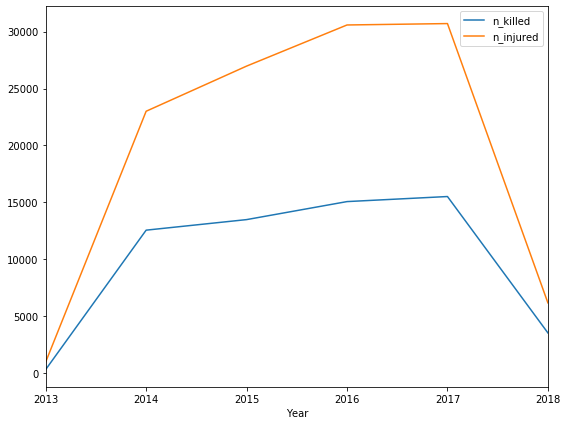

In [18]:
# Exploring the number of incidents(i.e. injuries and killings) per year

df_Year=df.groupby(['Year'])['n_killed','n_injured'].agg('sum')
df_Year.plot(figsize=(9,7))

It can be seen that the year 2017 recorded the highest number of Killings and injuries.

In [19]:
#Yer with the highest Killings and injuries

df_Year.head(1)

,n_killed,n_injured
Year,,
2013,317,979


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
incident_id,239677.0,559334.346404,293128.684285,92114.0000,308545.000000,543587.0000,817228.000000,1.083472e+06
n_killed,239677.0,0.252290,0.521779,0.0000,0.000000,0.0000,0.000000,5.000000e+01
n_injured,239677.0,0.494007,0.729952,0.0000,0.000000,0.0000,1.000000,5.300000e+01
latitude,231754.0,37.546598,5.130763,19.1114,33.903400,38.5706,41.437375,7.133680e+01
longitude,231754.0,-89.338348,14.359546,-171.4290,-94.158725,-86.2496,-80.048625,9.743310e+01
n_guns_involved,239677.0,1.372442,3.578322,1.0000,1.000000,1.0000,1.372442,4.000000e+02
Year,239677.0,2015.711629,1.225870,2013.0000,2015.000000,2016.0000,2017.000000,2.018000e+03
Month,239677.0,6.351786,3.447656,1.0000,3.000000,6.0000,9.000000,1.200000e+01
total_impacted,239677.0,0.746296,0.842343,0.0000,0.000000,1.0000,1.000000,1.030000e+02


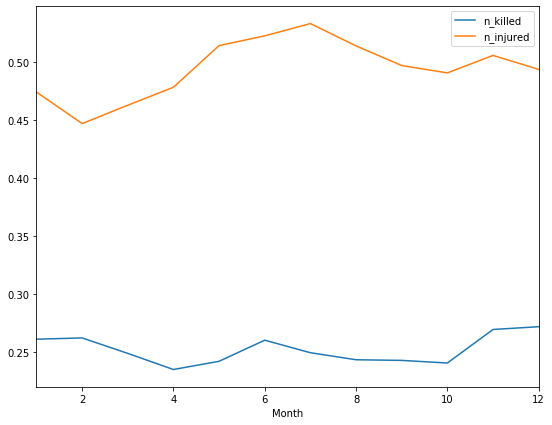

In [21]:
#Average number okf incidence per month.

df_Month=df.groupby(['Month'])['n_killed','n_injured'].mean()
df_Month.plot(figsize=(9,7))

Text(0.5, 1.0, 'State Vs Total Impact')

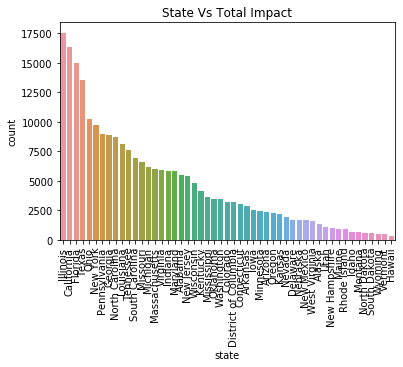

In [22]:
# Histogram showing the each state and the impact of the violence. total impact = number of injuries + number of killings

state_vs_total_impact=sns.countplot(x=df["state"],data=df,order=df["state"].value_counts().index)
state_vs_total_impact.set_xticklabels(state_vs_total_impact.get_xticklabels(),rotation=90)
state_vs_total_impact.set_title("State Vs Total Impact")

Text(0.5, 1.0, 'Top 10 Cities having high Impact of Violence')

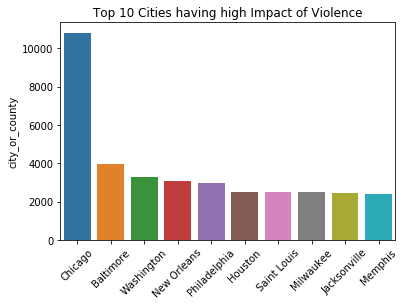

In [23]:
# Histogram showing the the top 10 cities with high crime rate

city_vs_total_impact = df['city_or_county'].value_counts().head(10)
city_vs_total_impact=sns.barplot(x=city_vs_total_impact.index,y=city_vs_total_impact)
city_vs_total_impact.set_xticklabels(city_vs_total_impact.get_xticklabels(),rotation=45)
city_vs_total_impact.set_title("Top 10 Cities having high Impact of Violence")

,Total_impacted
Year,
2013,1296
2014,35559
2015,40451
2016,45646
2017,46214
2018,9704


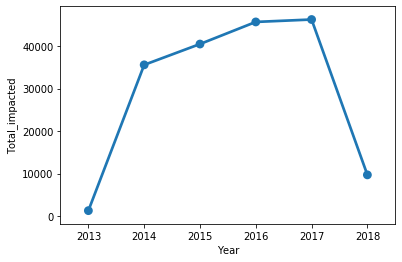

In [24]:
# Point plot showing yearly no of persons Killed 

yearly_vs_impacted = df.groupby(df["Year"]).apply(lambda x: pd.Series(dict(Total_impacted=x.total_impacted.sum())))
yearly_vs_impacted_plot=sns.pointplot(x=yearly_vs_impacted.index, y=yearly_vs_impacted.Total_impacted, data=yearly_vs_impacted,label="yearly_vs_Total_Impact")
yearly_vs_impacted

### Part IV: Conclusion
Summarize what was done in the project and what the key insights drawn from this project were.

### From the analysis and visualizations that carried out based on the goal set, I observed that:

* The year 2017 recorded the most incidence occuring due to the gun violence followed by 2016. ie. we see the highest number of killings and injuries occuring during this year.

* It can also be seen that following states namely; Illinois, Carlifonia,Florida and Texas were impacted thne most during the gun violence in the US. That is when total number of killings and injuries were combined they came out to be cities that were affected the most during the gun violence.

* Also, cities like the Chicago, Baltimore, and Washington were also affected the most during the gun violence in the US.